<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/me/est_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos Estatísticos

* **Prof.: Diego Barreto Haddad**
* **Aluno: Janio de Souza Lima**

Exercícios Aula 01

In [2]:
import pandas as pd

In [3]:
respostas = pd.DataFrame(data={
    'Resposta': [False, False, True, True, False, True, False, True, True, True, #Round1
                 True, False, False, True, True, False, False, True, False, True, #Round2
                 True, False, True, True, True, False, True, False, False, True, #Round3
                 True, True, True, False, True, False, False, False, True, True], #Round4
    'Segurança': [85, 65, 75, 75, 75, 55, 85, 65, 65, 85, #Round1
                  55, 75, 75, 85, 75, 85, 85, 55, 85, 75, #Round2
                  55, 75, 95, 55, 55, 55, 65, 65, 75, 55, #Round3
                  55, 95, 75, 65, 65, 75, 55, 55, 85, 95], #Round4
    'Gabarito': [False, True, True, True, False, False, True, True, False, True, #Round1
                 False, False, True, True, False, False, True, False, False, True, #Round2
                 True, True, True, True, True, False, False, True, True, False, #Round3
                 False, True, False, True, False, False, True, False, True, True] #Round4
})

In [4]:
respostas.head()

,Resposta,Segurança,Gabarito
0,False,85,False
1,False,65,True
2,True,75,True
3,True,75,True
4,False,75,False


In [5]:
respostas.Resposta == respostas.Gabarito

0      True
1     False
2      True
3      True
4      True
5     False
6     False
7      True
8     False
9      True
10    False
11     True
12    False
13     True
14    False
15     True
16    False
17    False
18     True
19     True
20     True
21    False
22     True
23     True
24     True
25     True
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
35     True
36    False
37     True
38     True
39     True
dtype: bool

In [6]:
respostas['Check_True'] = respostas.Resposta == respostas.Gabarito
#respostas['Check_False'] = respostas.Resposta != respostas.Gabarito
respostas

,Resposta,Segurança,Gabarito,Check_True
0,False,85,False,True
1,False,65,True,False
2,True,75,True,True
3,True,75,True,True
4,False,75,False,True
5,True,55,False,False
6,False,85,True,False
7,True,65,True,True
8,True,65,False,False
9,True,85,True,True


In [7]:
df = respostas.groupby(['Segurança', 'Check_True']).count().loc[:,['Resposta']]
df

Resposta
Segurança Check_True          
55        False              6
          True               5
65        False              6
          True               1
75        False              5
          True               6
85        False              2
          True               6
95        True               3

In [8]:
calibra = pd.DataFrame({'Faixa': [55, 65, 75, 85, 95],
                        'Calibração': [5/(5+6)*100,
                                       1/(1+6)*100,
                                       6/(6+5)*100,
                                       6/(6+2)*100,
                                       3/(3+0)*100]})

calibra

,Faixa,Calibração
0,55,45.454545
1,65,14.285714
2,75,54.545455
3,85,75.000000
4,95,100.000000


In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

In [17]:
import seaborn as sns

In [28]:
labels = list(calibra['Faixa'])
labels

[55, 65, 75, 85, 95]

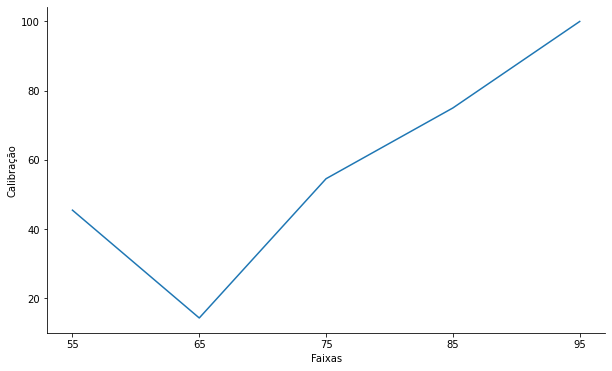

In [33]:
plt.figure(figsize=(10,6))
plt.plot(calibra.Calibração)
#plt.xticks()
#plt.xticks(labels=labels)
plt.xticks([0,1,2,3,4], labels=labels)
plt.ylabel('Calibração')
plt.xlabel('Faixas')
sns.despine()
plt.savefig('calibragem.png')

{'boxes': [<matplotlib.lines.Line2D at 0x7fe000cf0d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdffa8fad50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdffa902d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdffa902850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdffa8fa2d0>,
  <matplotlib.lines.Line2D at 0x7fdffa8fa810>]}

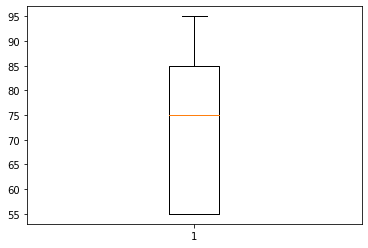

In [11]:
plt.boxplot(respostas.Segurança)

(array([11.,  0.,  7.,  0.,  0., 11.,  0.,  8.,  0.,  3.]),
 array([55., 59., 63., 67., 71., 75., 79., 83., 87., 91., 95.]),
 <a list of 10 Patch objects>)

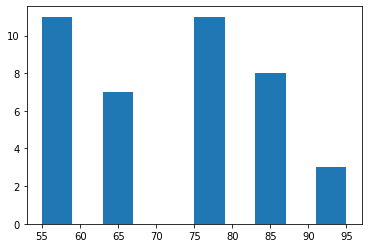

In [12]:
plt.hist(respostas.Segurança)

In [13]:
respostas.describe()

,Segurança
count,40.000000
mean,71.250000
std,12.947131
min,55.000000
25%,55.000000
50%,75.000000
75%,85.000000
max,95.000000


In [14]:
print('Mediana:', respostas.Segurança.median())

Mediana: 75.0


In [15]:
print('Moda:', respostas.Segurança.mode())

Moda: 0    55
1    75
dtype: int64
